In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib.patches import Rectangle
% matplotlib inline

In [2]:
mass = 1.4e-3 #kg
rod_l = 9.381e-2 #m
handle_d = 1.261e-2 #m
cue_r = .5*5.379e-2 #m

# Measuring Magnetic Moment

### Harmonic Oscillation of a Spherical Pendulum

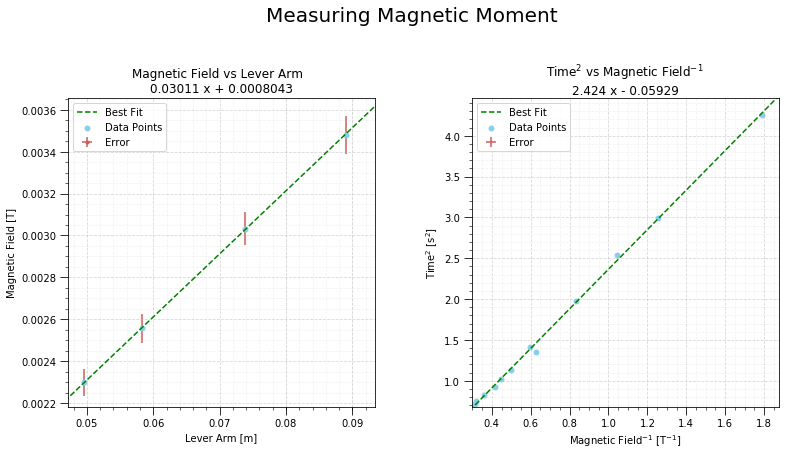

In [3]:
r = np.array([4.961,5.831,8.901, 7.381]) * 1e-2
amp = [1.69,1.88,2.56, 2.23]
amp2 = 1./np.array([.7,1.0,1.2,1.5,2.0,2.1,2.5,2.8,3.0,3.5,3.9,4.0])
sec = np.array([2.061,1.73,1.595,1.404,1.161,1.19,1.065,1.013,.958,.906,.865,.8485])**2
B = 1.36e-3
tesla = [1.69*B,1.88*B,2.56*B, 2.23*B]
tesla2 = amp2*((4.*np.pi**2*4.313e-5)/B)
amp_fit = np.polyfit(r,amp,1)
amp_fit = np.poly1d(amp_fit)
amp_fit_range = np.linspace(0, 10, 100)
amp2_fit = np.polyfit(amp2,sec,1)
amp2_fit = np.poly1d(amp2_fit)
amp2_fit_range = np.linspace(0, 10, 100)
tesla_fit = np.polyfit(r,tesla,1)
tesla_fit = np.poly1d(tesla_fit)
tesla_fit_range = np.linspace(0, 10, 100)
tesla2_fit = np.polyfit(tesla2,sec,1)
tesla2_fit = np.poly1d(tesla2_fit)
tesla2_fit_range = np.linspace(0, 10, 100)

tesla_err = [amp[i]*B*(.01 / amp[i] + .03e-3 / B) for i, val in enumerate(amp)]
tesla2_err = [amp2[i]*B*(.01 / amp2[i] + .03e-3 / B) for i, val in enumerate(amp2)]

height_ratios = [.25,6]
width_ratios = [6,.25,6]
wspace = 0.25
hspace = 0.25
fig = plt.figure(figsize=(sum(width_ratios) + wspace * (len(width_ratios) - 1),
                          sum(height_ratios) + hspace * (len(height_ratios) - 1)))
gs = gridspec.GridSpec(len(height_ratios), len(width_ratios), height_ratios=height_ratios, width_ratios=width_ratios)
fig.suptitle('Measuring Magnetic Moment', fontsize=20)


ax = fig.add_subplot(gs[1, 0])
ax.scatter(r,tesla, marker='o', s=24, c = 'skyblue', label='Data Points')
ax.plot(tesla_fit_range, tesla_fit(tesla_fit_range), '--', c = 'green', label='Best Fit')
ax.errorbar(r, tesla, xerr=0.01 * 1e-2, yerr=tesla_err, fmt='.', c='indianred', label='Error', zorder=0)
ax.update({'title': 'Magnetic Field vs Lever Arm {}'.format(tesla_fit),
            'xlabel': 'Lever Arm [m]',
            'ylabel': 'Magnetic Field [T]',
            'xlim': (min(r) - min(r)*.05, max(r) + max(r)*.05),
            'ylim': (min(tesla) - min(tesla)*.05, max(tesla) + max(tesla)*.05)})
ax.minorticks_on()
ax.tick_params('both', length=8, which='major')
ax.tick_params('both',length=3, which='minor')
ax.grid(True, which='major', ls='dashed', alpha=.5)
ax.grid(True, which='minor', ls='dashed', alpha=.15)
ax.legend(loc='best')

ax = fig.add_subplot(gs[1, 2])
ax.scatter(tesla2, sec, marker='o', s=24, c = 'skyblue', label='Data Points')
ax.plot(tesla2_fit_range, tesla2_fit(tesla2_fit_range), '--', c = 'green', label='Best Fit')
ax.errorbar(tesla2, sec, xerr=tesla2_err, yerr=.02**2, fmt=',', c='indianred', label='Error', zorder=0)
ax.update({'title': 'Time$^{2}$ vs Magnetic Field$^{-1}$' + '{}'.format(tesla2_fit),
            'xlabel': 'Magnetic Field$^{-1}$ [T$^{-1}$]',
            'ylabel': 'Time$^{2}$ [s$^{2}$]',
            'xlim': (min(tesla2) - min(tesla2)*.05, max(tesla2) + max(tesla2)*.05),
            'ylim': (min(sec)*.95, max(sec)*1.05)})
ax.minorticks_on()
ax.tick_params('both', length=8, which='major')
ax.tick_params('both',length=3, which='minor')
ax.grid(True, which='major', ls='dashed', alpha=.5)
ax.grid(True, which='minor', ls='dashed', alpha=.15)
ax.legend(loc='best')

plt.show()

In [4]:
tesla_fit[1] * mass * 9.81

0.00041355587333320493

In [5]:
moment = 4.313e-5
4.*np.pi**2*moment/tesla2_fit[1]

0.00070243254921829033

# Hall Effect

Power Supply: 4.5 Volts, 2.05 Amperes

Multimeter: 1.16 +- .02 Volts, 1.92 +- .01 Amperes

In [6]:
coil_rad = (46.68-4.07) / 2. * 1e-3
B_field = 15.*1.92*.9e-6 / (coil_rad)
print B_field
voltage = 1.16 / 10
voltage_err = .02 / 10
proportionality = B_field / voltage
print proportionality

0.00121661581788
0.0104880673955


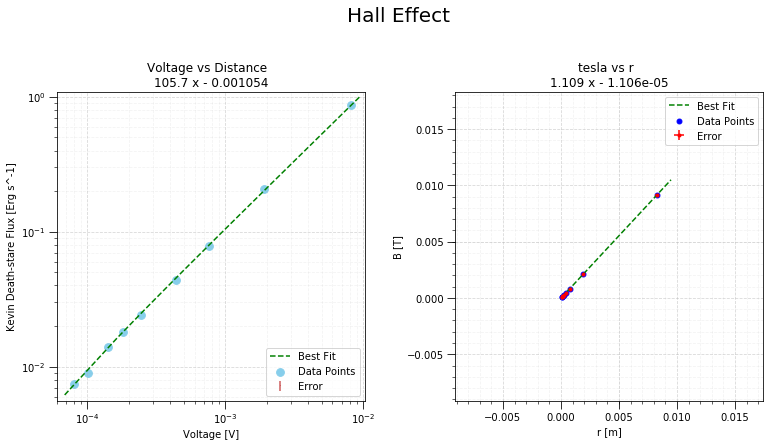

In [7]:
distance = np.array([0,3.1,8.2,14.2,18.2,11.0,12.7,16.5,6.0]) + 4.951
distance = 1./(distance**3)
voltage = np.array([869.0, 206.0, 44.0, 14.0, 7.5, 24.0, 18.0, 9.0, 79.0]) * 1e-3
voltage_err = np.array([.002, .002, .002, .002, .0009, .001, .002, .001, .001]) * 1e-3
tesla = voltage * proportionality
tesla_err = voltage_err * proportionality

voltage_fit = np.polyfit(distance,voltage,1)
voltage_fit = np.poly1d(voltage_fit)
voltage_fit_range = np.linspace(min(distance) - min(distance)*.15, max(distance) + max(distance)*.15, 100)
tesla_fit = np.polyfit(distance,tesla,1)
tesla_fit = np.poly1d(tesla_fit)
tesla_fit_range = np.linspace(min(distance) - min(distance)*.15, max(distance) + max(distance)*.15, 100)


height_ratios = [.15,6]
width_ratios = [6,.15,6]
wspace = 0.25
hspace = 0.25
fig = plt.figure(figsize=(sum(width_ratios) + wspace * (len(width_ratios) - 1),
                          sum(height_ratios) + hspace * (len(height_ratios) - 1)))
gs = gridspec.GridSpec(len(height_ratios), len(width_ratios), height_ratios=height_ratios, width_ratios=width_ratios)

fig.suptitle('Hall Effect', fontsize=20)


ax = fig.add_subplot(gs[1, 0])

ax.scatter(distance, voltage, marker='o', s=60, c = 'skyblue', label='Data Points')
ax.plot(voltage_fit_range, voltage_fit(voltage_fit_range), '--', c = 'green', label='Best Fit')
ax.errorbar(distance, voltage, yerr=voltage_err, fmt=',', c='indianred', label='Error', zorder=0)
ax.update({'title': 'Voltage vs Distance {}'.format(voltage_fit),
            'xlabel': 'Voltage [V]',
            'ylabel': 'Kevin Death-stare Flux [Erg s^-1]'})
ax.set_xlim(min(distance) - min(distance)*.25, max(distance) + max(distance)*.25)
ax.set_ylim(min(voltage) - min(voltage)*.25, max(voltage) + max(voltage)*.25)
ax.set_xscale('log')
ax.set_yscale('log')

ax.legend(loc=4)

ax.minorticks_on()
ax.tick_params('both', length=8, which='major')
ax.tick_params('both',length=3, which='minor')
ax.grid(True, which='major', ls='dashed', alpha=.5)
ax.grid(True, which='minor', ls='dashed', alpha=.15)

ax = fig.add_subplot(gs[1, 2])
ax.scatter(distance,tesla, marker='o', s=24, c = 'blue', label='Data Points')
ax.plot(tesla_fit_range, tesla_fit(tesla_fit_range), '--', c = 'green', label='Best Fit')
ax.errorbar(distance, tesla, xerr=0.01*proportionality, yerr=tesla_err, fmt='.', c='red', label='Error')
ax.update({'title': 'tesla vs r {}'.format(tesla_fit),
            'xlabel': 'r [m]',
            'ylabel': 'B [T]'})

ax.minorticks_on()
ax.tick_params('both', length=8, which='major')
ax.tick_params('both',length=3, which='minor')
ax.grid(True, which='major', ls='dashed', alpha=.5)
ax.grid(True, which='minor', ls='dashed', alpha=.15)
ax.legend(loc='best')

In [8]:
mu_0 = np.pi*4e-7


np.pi*2*tesla_fit[1]/mu_0

5542883.9228034699

shit_finder 1.60723275582e-21
mu_s: 1.00991060182e-23 
g: 2.18046603002
mu_s error: 0.0889698100325 
g error: 0.0889698100325


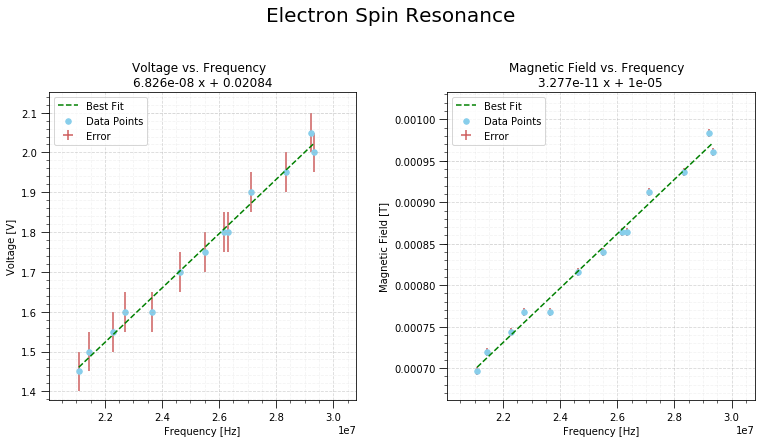

In [9]:
h = 6.626e-34
g = 2.00232
mu_s = 9.274e-24

freq = np.array([21.09, 21.44, 22.29, 22.72, 23.65, 24.64, 25.51, 26.17, 26.33, 27.11, 28.33, 29.21, 29.34])*1e6
voltage  = np.array([14.5, 15.0, 15.5, 16.0, 16.0, 17.0, 17.5, 18.0, 18.0, 19.0, 19.5, 20.5, 20.0]) / 2. / 5.
B  = (np.array([14.5, 15.0, 15.5, 16.0, 16.0, 17.0, 17.5, 18.0, 18.0, 19.0, 19.5, 20.5, 20.0]) / 2.)*(.48e-3) / 5.
freq_err = .01*1e6
voltage_err  = .5 / 2. / 5.
B_err = voltage_err * .48e-3 / 5.

voltage_fit = np.polyfit(freq,voltage,1)
voltage_fit = np.poly1d(voltage_fit)
voltage_fit_range = np.linspace(min(freq), max(freq), 100)
B_fit = np.polyfit(freq,B,1)
B_fit = np.poly1d(B_fit)
B_fit_range = np.linspace(min(freq), max(freq), 100)

height_ratios = [.15, 6]
width_ratios = [6, .15, 6]
wspace = 0.25
hspace = 0.25
fig = plt.figure(figsize=(sum(width_ratios) + wspace * (len(width_ratios) - 1),
                          sum(height_ratios) + hspace * (len(height_ratios) - 1)))
gs = gridspec.GridSpec(len(height_ratios), len(width_ratios), height_ratios=height_ratios, width_ratios=width_ratios)

fig.suptitle('Electron Spin Resonance', fontsize=20)

ax = fig.add_subplot(gs[1, 0])
ax.scatter(freq, voltage, marker='.', s=120, c = 'skyblue', label='Data Points')
ax.plot(voltage_fit_range, voltage_fit(voltage_fit_range), '--', c = 'green', label='Best Fit')
ax.errorbar(freq, voltage, xerr=freq_err, yerr=voltage_err, fmt=',', c='indianred', label='Error', zorder=0)
ax.update({'title': 'Voltage vs. Frequency {}'.format(voltage_fit),
           'xlabel': 'Frequency [Hz]',
           'ylabel': 'Voltage [V]',
           'xlim': (min(freq) - min(freq)*.05, max(freq) + max(freq)*.05),
           'ylim': (min(voltage) - min(voltage)*.05, max(voltage) + max(voltage)*.05)})

ax.minorticks_on()
ax.tick_params('both', length=8, which='major')
ax.tick_params('both',length=3, which='minor')
ax.grid(True, which='major', ls='dashed', alpha=.5)
ax.grid(True, which='minor', ls='dashed', alpha=.15)
ax.legend(loc='best')

ax = fig.add_subplot(gs[1, 2])
ax.scatter(freq, B, marker='.', s=120, c = 'skyblue', label='Data Points')
ax.plot(B_fit_range, B_fit(B_fit_range), '--', c = 'green', label='Best Fit')
ax.errorbar(freq, B, xerr=freq_err, yerr=B_err, fmt=',', c='indianred', label='Error', zorder=0)
ax.update({'title': 'Magnetic Field vs. Frequency {}'.format(B_fit),
           'xlabel': 'Frequency [Hz]',
           'ylabel': 'Magnetic Field [T]',
           'xlim': (min(freq) - min(freq)*.05, max(freq) + max(freq)*.05),
           'ylim': (min(B) - min(B)*.05, max(B) + max(B)*.05)})

ax.minorticks_on()
ax.tick_params('both', length=8, which='major')
ax.tick_params('both',length=3, which='minor')
ax.grid(True, which='major', ls='dashed', alpha=.5)
ax.grid(True, which='minor', ls='dashed', alpha=.15)
ax.legend(loc='best')

mu_s_calculated = h/(g*B_fit[1])
g_calculated = h/(mu_s*B_fit[1])
mu_s_error = abs(mu_s - mu_s_calculated) / mu_s
g_error = abs(g - g_calculated) / g

shit_finder = (np.average(B)/np.average(freq))*(np.average(B_err / B) + np.average(freq_err / freq))

print  "shit_finder", h/(shit_finder*g)

print "mu_s:", mu_s_calculated, "\ng:", g_calculated
print "mu_s error:", mu_s_error, "\ng error:", g_error